## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## I. Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1


#### Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


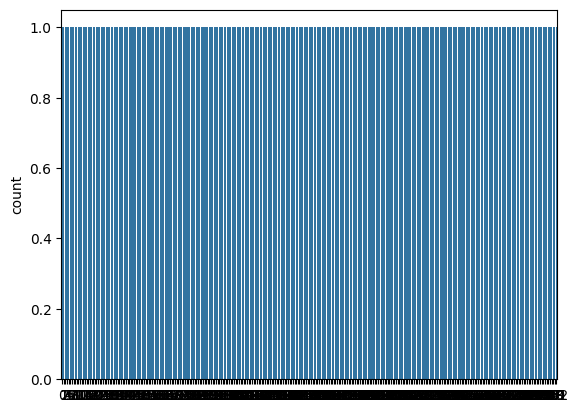

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

####첫 번째 Dense 레이어 : Dense(11, activation='relu', input_dim=11)
*   Dense(11): 이 레이어는 11개의 뉴런(유닛)을 갖는 완전 연결 레이어입니다. 레이어의 출력은 11개의 뉴런으로 구성됩니다.
*   activation='relu': 이 레이어는 ReLU(Rectified Linear Unit) 활성화 함수를 사용합니다. ReLU는 출력값을 0 이상으로 만들고, 음수 값을 0으로 변환하는 비선형 활성화 함수입니다. 이를 통해 비선형성을 모델에 추가합니다
*   input_dim=13: 이 레이어는 입력으로 13개의 특성을 받도록 설정되어 있습니다. 입력 데이터의 형상이 (batch_size, 13)이 됩니다. 여기서 batch_size는 한 번에 처리할 데이터 샘플의 수를 나타내며, 13은 각 샘플의 특성(피처) 수를 나타냅니다.

#### 두 번째 Dense 레이어 : model.add(Dense(1, activation='sigmoid'))
*   Dense(1): 이 레이어는 1개의 뉴런을 갖는 완전 연결 레이어입니다. 이 레이어의 출력은 1개의 뉴런으로 구성됩니다.
*   activation='sigmoid': 이 레이어는 시그모이드(Sigmoid) 활성화 함수를 사용합니다. 시그모이드는 출력값을 0과 1 사이로 변환합니다. 주로 이진 분류 문제에서 사용됩니다.

###전체적인 구조
입력 레이어: 첫 번째 Dense 레이어는 입력으로 13개의 특성을 받습니다.
은닉 레이어: 첫 번째 Dense 레이어는 11개의 뉴런을 가지며, ReLU 활성화 함수를 사용하여 입력 데이터를 처리합니다.
출력 레이어: 두 번째 Dense 레이어는 1개의 뉴런을 가지며, 시그모이드 활성화 함수를 사용하여 최종 출력을 생성합니다. 이 출력은 0과 1 사이의 값을 가지므로, 이진 분류 문제에 적합합니다.

##데이터 정규화

In [ ]:
# 데이터 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 0.7763 - accuracy: 0.4463
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 0.7369 - accuracy: 0.5041
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.5620
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5909
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6240
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6612
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.6860
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.6983
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6983
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7107
Epoch 11/300
8/8 [===========

In [ ]:
Y_pred_nn = model.predict(X_test_scaled)

2/2 [==============================] - 0s 5ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 90.16 %


## VI. Output final score

In [ ]:
# scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
# algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

# for i in range(len(algorithms)):
#     print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")